# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [501]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [502]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [503]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [504]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.1 Sorted by time

In [505]:
#https://stats.stackexchange.com/questions/341312/train-test-split-with-time-and-person-indexed-data
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [506]:
project_data.shape

(109248, 17)

##1.2 Adding resource data in dataframe

In [507]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [508]:
#Reseting index
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [509]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

  project_subject_categories            project_subject_subcategories  \
0             Math & Science  Applied Sciences, Health & Life Science   
1              Special Needs                            Special Needs   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity  
0         4  
1         8

In [510]:
project_data = project_data.sample(n=50000)
#project_data=project_data.tail(1000)
project_data.shape

(50000, 19)

In [511]:
project_data.shape

(50000, 19)

## Some basic preprocessing

In [512]:
project_data["project_grade_category"][0:5]

104170    Grades PreK-2
42182        Grades 6-8
13884     Grades PreK-2
107568       Grades 3-5
11786        Grades 3-5
Name: project_grade_category, dtype: object

So need to connect the Grade name

In [513]:
'''project_grade_category = []

for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ","_")
    project_grade_category.append(a)'''

'project_grade_category = []\n\nfor i in range(len(project_data)):\n    a = project_data["project_grade_category"][i].replace(" ","_")\n    project_grade_category.append(a)'

All grade name is connected

## 1.3 preprocessing of `project_subject_categories`

In [514]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.4 preprocessing of `project_subject_subcategories`

In [515]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [516]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories'],
      dtype='object')

## 1.3 Text preprocessing

In [517]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [518]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
104170      159501  p154323  5560f485ef76d4b3aa2af6aefccdae9f            Ms.   
42182       122760  p174505  0c1328771859e3d06089a6efe7096665           Mrs.   

       school_state                Date project_grade_category  \
104170           DC 2017-04-04 08:56:37          Grades PreK-2   
42182            HI 2016-09-01 20:55:03             Grades 6-8   

                                   project_title  \
104170  Little Einsteins: Geniuses in the Making   
42182   Frogs & Earthworms... Let's Look Inside!   

                                          project_essay_1  \
104170  I currently serve a group of young learners, p...   
42182   My school serves students in grades K-12 in a ...   

                                          project_essay_2 project_essay_3  \
104170  My students will use the materials for early m...             NaN   
42182   Science is a stimulating subject, especially w...             NaN   

       project_essay_4                           project_resource_summary  \
104170             NaN  My students need materials like to Roll and Wr...   
42182              NaN  My students need animal dissection kits, a lab...   

        teacher_number_of_previously_posted_projects  project_is_approved  \
104170                                             5                    1   
42182                                              4                    1   

         price  quantity clean_categories clean_subcategories  \
104170  107.93         7     Math_Science         Mathematics   
42182   390.26        26     Math_Science  Health_LifeScience   

                                                    essay  
104170  I currently serve a group of young learners, p...  
42182   My school serves students in grades K-12 in a ...

In [519]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [520]:
'''# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)'''

'# printing some random reviews\nprint(project_data[\'essay\'].values[0])\nprint("="*50)\nprint(project_data[\'essay\'].values[150])\nprint("="*50)\nprint(project_data[\'essay\'].values[1000])\nprint("="*50)\nprint(project_data[\'essay\'].values[20000])\nprint("="*50)\nprint(project_data[\'essay\'].values[99999])\nprint("="*50)'

In [521]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [522]:
'''sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)'''

'sent = decontracted(project_data[\'essay\'].values[20000])\nprint(sent)\nprint("="*50)'

In [523]:
'''# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)'''

'# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/\nsent = sent.replace(\'\\r\', \' \')\nsent = sent.replace(\'\\"\', \' \')\nsent = sent.replace(\'\\n\', \' \')\nprint(sent)'

In [524]:
'''#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)'''

"#remove spacial character: https://stackoverflow.com/a/5843547/4084039\nsent = re.sub('[^A-Za-z0-9]+', ' ', sent)\nprint(sent)"

In [525]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### 1.3.1Preprocess of Preprocessing of `essay`

In [526]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:23<00:00, 2130.99it/s]


In [527]:
# after preprocesing
#preprocessed_essays[10:]

In [528]:
project_data['preprocessed_essays'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)

###<h2><font color='red'> 1.3.2Preprocessing of `project_title`</font></h2>

In [529]:
# similarly you can preprocess the titles also

In [530]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 50234.33it/s]


In [531]:
# after preprocesing
#preprocessed_project_title[1000]

In [532]:
#https://stackoverflow.com/questions/26666919/add-column-in-dataframe-from-list/38490727
project_data['preprocessed_project_title'] = preprocessed_project_title
project_data.drop(['project_title'], axis=1, inplace=True)

In [533]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
104170      159501  p154323  5560f485ef76d4b3aa2af6aefccdae9f            Ms.   
42182       122760  p174505  0c1328771859e3d06089a6efe7096665           Mrs.   

       school_state                Date project_grade_category  \
104170           DC 2017-04-04 08:56:37          Grades PreK-2   
42182            HI 2016-09-01 20:55:03             Grades 6-8   

                                          project_essay_1  \
104170  I currently serve a group of young learners, p...   
42182   My school serves students in grades K-12 in a ...   

                                          project_essay_2 project_essay_3  \
104170  My students will use the materials for early m...             NaN   
42182   Science is a stimulating subject, especially w...             NaN   

       project_essay_4                           project_resource_summary  \
104170             NaN  My students need materials like to Roll and Wr...   
42182              NaN  My students need animal dissection kits, a lab...   

        teacher_number_of_previously_posted_projects  project_is_approved  \
104170                                             5                    1   
42182                                              4                    1   

         price  quantity clean_categories clean_subcategories  \
104170  107.93         7     Math_Science         Mathematics   
42182   390.26        26     Math_Science  Health_LifeScience   

                                      preprocessed_essays  \
104170  i currently serve group young learners pre sch...   
42182   my school serves students grades k 12 low inco...   

              preprocessed_project_title  
104170  little einsteins geniuses making  
42182   frogs earthworms let look inside

### word in project title and essay

In [534]:
#https://stackoverflow.com/questions/49984905/count-number-of-words-per-row
project_data['totalwords_title'] = project_data['preprocessed_project_title'].str.split().str.len()

project_data['totalwords_essay'] = project_data['preprocessed_essays'].str.split().str.len()

### sentiment value

In [535]:
#sentiment analysis of essay
#_____________________________________________
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')
catogories = list(project_data['preprocessed_essays'].values)
sentiment_positive=[]
sentiment_negative=[]
sentiment_neutral=[]
sentiment_compound=[]
#cat_list = []
for i in catogories:
  sid = SentimentIntensityAnalyzer()
  sentiment_val=sid.polarity_scores(i)
  #cat_list.append(sentiment_val)
  sentiment_positive.append(sentiment_val['pos'])
  sentiment_negative.append(sentiment_val['neg'])
  sentiment_neutral.append(sentiment_val['neu'])
  sentiment_compound.append(sentiment_val['compound'])
    
#project_data['sentiment_pos_value'] = cat_list
project_data['sentiment_pos_essay']=sentiment_positive
project_data['sentiment_neg_essay']=sentiment_negative
project_data['sentiment_neu_essay']=sentiment_neutral
project_data['sentiment_compound_essay']=sentiment_compound




[nltk_data] Downloading package vader_lexicon to C:\Users\Prof Arkopal
[nltk_data]     Goswami\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [536]:
sentiment_pos_essay=project_data['sentiment_pos_essay'].values.reshape(-1,1)
sentiment_neg_essay=project_data['sentiment_neg_essay'].values.reshape(-1,1)
sentiment_neu_essay=project_data['sentiment_neu_essay'].values.reshape(-1,1)
sentiment_compound_essay=project_data['sentiment_compound_essay'].values.reshape(-1,1)
sentiment_pos_essay.shape

(50000, 1)

In [537]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 104170 to 104010
Data columns (total 26 columns):
Unnamed: 0                                      50000 non-null int64
id                                              50000 non-null object
teacher_id                                      50000 non-null object
teacher_prefix                                  49999 non-null object
school_state                                    50000 non-null object
Date                                            50000 non-null datetime64[ns]
project_grade_category                          50000 non-null object
project_essay_1                                 50000 non-null object
project_essay_2                                 50000 non-null object
project_essay_3                                 1701 non-null object
project_essay_4                                 1701 non-null object
project_resource_summary                        50000 non-null object
teacher_number_of_previously_posted_proj

## 1.5 Preparing data for models

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.4 Merging all the above features

__ Computing Sentiment Scores__

In [538]:
'''import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93'''

"import nltk\nfrom nltk.sentiment.vader import SentimentIntensityAnalyzer\n\n# import nltk\n# nltk.download('vader_lexicon')\n\nsid = SentimentIntensityAnalyzer()\n\nfor_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide rangeof techniques to help all my students succeed students in my class come from a variety of different backgrounds which makesfor wonderful sharing of experiences and cultures including native americans our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it ismastered having the social skills to work cooperatively with friends is a crucial aspect of the 

In [539]:
#!pip install vaderSentiment

# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Logistic Regression </h1>

##<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [540]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [541]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from collections import Counter
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [542]:
y=project_data['project_is_approved']
y.shape

(50000,)

In [543]:
#replace NAN to space https ://stackoverflow.com/questions/49259305/raise-valueerrornp-nan-is-an-invalid-document-expected-byte-or?rq=1
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna(' ')

In [544]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#split the data into train and test fo bag of words
# Since im using Gridsearch cross validation, we dont need cross validation data(already build in dataset)
x_train,x_test,y_train,y_test=model_selection.train_test_split(project_data,y,test_size=0.3,random_state=0)
#split train into cross val train and cross val test
#x_train,x_cv,y_train,y_cv=model_selection.train_test_split(x_t,y_t,test_size=0.3,random_state=0)

In [545]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'preprocessed_essays', 'preprocessed_project_title', 'totalwords_title',
       'totalwords_essay', 'sentiment_pos_essay', 'sentiment_neg_essay',
       'sentiment_neu_essay', 'sentiment_compound_essay'],
      dtype='object')

##2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

###2.2.1 encoding categorical features

In [546]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [547]:
x_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
10309      174284  p257365  6a84f6150d7e198f2a6b573b533665b4           Mrs.   
73159       29283  p056076  e7d33e3db038d512b0d24d2948f5d046            Ms.   

      school_state                Date project_grade_category  \
10309           OR 2016-06-22 12:04:03          Grades PreK-2   
73159           FL 2016-12-05 10:09:13          Grades PreK-2   

                                         project_essay_1  \
10309  \"Technology will not replace teachers, but te...   
73159  A teacher is a compass that activates the magn...   

                                         project_essay_2 project_essay_3  \
10309  Students in my classroom will be using our Chr...             NaN   
73159  My project will help my students communicate d...             NaN   

                ...                              clean_categories  \
10309           ...                                  Math_Science   
73159           ...             Literacy_Language AppliedLearning   

              clean_subcategories  \
10309                 Mathematics   
73159  Literacy ParentInvolvement   

                                     preprocessed_essays  \
10309  technology not replace teachers teachers use t...   
73159  a teacher compass activates magnets curiosity ...   

       preprocessed_project_title  totalwords_title  totalwords_essay  \
10309            chromebooks kids                 2               169   
73159     classdojo with families                 3               115   

      sentiment_pos_essay sentiment_neg_essay sentiment_neu_essay  \
10309               0.185               0.033               0.782   
73159               0.359               0.000               0.641   

      sentiment_compound_essay  
10309                   0.9747  
73159                   0.9932  

[2 rows x 26 columns]

### encoding categorical variable

In [548]:
#one hot encoding for clean_categories
#_________________________
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(x_train['clean_categories'].values)
x_train_categories_one_hot = vectorizer.transform(x_train['clean_categories'].values)
#x_cv_categories_one_hot = vectorizer.transform(x_cv['clean_categories'].values)
x_test_categories_one_hot = vectorizer.transform(x_test['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",x_train_categories_one_hot.shape)
#print("Shape of matrix after one hot encodig ",x_cv_categories_one_hot.shape)
print("Shape of matrix after one hot encodig ",x_test_categories_one_hot.shape)
print("*"*50)

print(x_train_categories_one_hot[0:5])

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (35000, 9)
Shape of matrix after one hot encodig  (15000, 9)
**************************************************
  (0, 7)	1
  (1, 4)	1
  (1, 8)	1
  (2, 7)	1
  (2, 8)	1
  (3, 7)	1
  (3, 8)	1
  (4, 0)	1
  (4, 1)	1


In [549]:
#one hot encoding for clean_subcategories
#_________________________
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
x_train_subcategories_one_hot = vectorizer.fit_transform(x_train['clean_subcategories'].values)
#x_cv_subcategories_one_hot = vectorizer.fit_transform(x_cv['clean_subcategories'].values)
x_test_subcategories_one_hot = vectorizer.fit_transform(x_test['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",x_train_subcategories_one_hot.shape)
#print("Shape of matrix after one hot encodig ",x_cv_subcategories_one_hot.shape)
print("Shape of matrix after one hot encodig ",x_test_subcategories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'PerformingArts', 'SocialSciences', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (35000, 30)
Shape of matrix after one hot encodig  (15000, 30)


In [550]:
#one hot encoding for school_state



my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())
    
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

#_________________________
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
x_train_school_state_one_hot = vectorizer.fit_transform(x_train['school_state'].values)
#x_cv_school_state_one_hot = vectorizer.fit_transform(x_cv['school_state'].values)
x_test_school_state_one_hot = vectorizer.fit_transform(x_test['school_state'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",x_train_school_state_one_hot.shape)
#print("Shape of matrix after one hot encodig ",x_cv_school_state_one_hot.shape)
print("Shape of matrix after one hot encodig ",x_test_school_state_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'AK', 'DE', 'NH', 'NM', 'ME', 'DC', 'WV', 'HI', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'NV', 'MS', 'MD', 'CT', 'UT', 'AL', 'TN', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'OH', 'LA', 'MO', 'IN', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encodig  (35000, 51)
Shape of matrix after one hot encodig  (15000, 51)


In [551]:
#one hot encoding for project_grade_category


my_counter = Counter()
for project_grade in project_data['project_grade_category'].values:
    my_counter.update(project_grade.split())
    
    
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))
#_________________________
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
x_train_grade_category_one_hot = vectorizer.fit_transform(x_train['project_grade_category'].values)
#x_cv_grade_category_one_hot = vectorizer.fit_transform(x_cv['project_grade_category'].values)
x_test_grade_category_one_hot = vectorizer.fit_transform(x_test['project_grade_category'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",x_train_grade_category_one_hot.shape)
#print("Shape of matrix after one hot encodig ",x_cv_grade_category_one_hot.shape)
print("Shape of matrix after one hot encodig ",x_test_grade_category_one_hot.shape)

['9-12', '6-8', '3-5', 'PreK-2', 'Grades']
Shape of matrix after one hot encodig  (35000, 5)
Shape of matrix after one hot encodig  (15000, 5)


In [552]:
#one hot encoding for prefix_category

my_counter = Counter()
for teacher_prefix in project_data['teacher_prefix'].values:
    teacher_prefix = str(teacher_prefix)
    my_counter.update(teacher_prefix.split())
    
teacher_prefix_cat_dict = dict(my_counter)
sorted_teacher_prefix_cat_dict = dict(sorted(teacher_prefix_cat_dict.items(), key=lambda kv: kv[1]))

#_________________________
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_cat_dict.keys()), lowercase=False, binary=True)
x_train_prefix_one_hot = vectorizer.fit_transform(x_train['teacher_prefix'].values)
#x_cv_prefix_one_hot = vectorizer.fit_transform(x_cv['teacher_prefix'].values)
x_test_prefix_one_hot = vectorizer.fit_transform(x_test['teacher_prefix'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",x_train_prefix_one_hot.shape)
#print("Shape of matrix after one hot encodig ",x_cv_prefix_one_hot.shape)
print("Shape of matrix after one hot encodig ",x_test_prefix_one_hot.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encodig  (35000, 5)
Shape of matrix after one hot encodig  (15000, 5)


### encodind number of word in title and essay

In [566]:
#https://stackoverflow.com/questions/49984905/count-number-of-words-per-row
project_data['totalwords_title'] = project_data['preprocessed_project_title'].str.split().str.len()

project_data['totalwords_essay'] = project_data['preprocessed_essays'].str.split().str.len()

In [567]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(x_train['totalwords_title'].values.reshape(-1,1))

x_train_title_word_normalize = normalizer.transform(x_train['totalwords_title'].values.reshape(-1,1))
#x_cv_price_standardized = normalizer.transform(x_cv['price'].values.reshape(-1,1))
x_test_title_word_normalize = normalizer.transform(x_test['totalwords_title'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_title_word_normalize.shape, y_train.shape)
#print(x_cv_price_standardized.shape, y_cv.shape)
print(x_test_title_word_normalize.shape, y_test.shape)

After vectorizations
(35000, 1) (35000,)
(15000, 1) (15000,)


In [568]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(x_train['totalwords_essay'].values.reshape(-1,1))

x_train_essay_word_normalize = normalizer.transform(x_train['totalwords_essay'].values.reshape(-1,1))
#x_cv_price_standardized = normalizer.transform(x_cv['price'].values.reshape(-1,1))
x_test_essay_word_normalize = normalizer.transform(x_test['totalwords_essay'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_essay_word_normalize.shape, y_train.shape)
#print(x_cv_price_standardized.shape, y_cv.shape)
print(x_test_essay_word_normalize.shape, y_test.shape)

After vectorizations
(35000, 1) (35000,)
(15000, 1) (15000,)


### encoding sentiment value

In [569]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(x_train['sentiment_pos_essay'].values.reshape(-1,1))

x_train_sentiment_pos_essay_normalize = normalizer.transform(x_train['sentiment_pos_essay'].values.reshape(-1,1))
#x_cv_price_standardized = normalizer.transform(x_cv['price'].values.reshape(-1,1))
x_test_sentiment_pos_essay_normalize = normalizer.transform(x_test['sentiment_pos_essay'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_sentiment_pos_essay_normalize.shape, y_train.shape)
#print(x_cv_price_standardized.shape, y_cv.shape)
print(x_test_sentiment_pos_essay_normalize.shape, y_test.shape)

After vectorizations
(35000, 1) (35000,)
(15000, 1) (15000,)


In [570]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(x_train['sentiment_neg_essay'].values.reshape(-1,1))

x_train_sentiment_neg_essay_normalize = normalizer.transform(x_train['sentiment_neg_essay'].values.reshape(-1,1))
#x_cv_price_standardized = normalizer.transform(x_cv['price'].values.reshape(-1,1))
x_test_sentiment_neg_essay_normalize = normalizer.transform(x_test['sentiment_neg_essay'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_sentiment_neg_essay_normalize.shape, y_train.shape)
#print(x_cv_price_standardized.shape, y_cv.shape)
print(x_test_sentiment_neg_essay_normalize.shape, y_test.shape)

After vectorizations
(35000, 1) (35000,)
(15000, 1) (15000,)


In [571]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(x_train['sentiment_neu_essay'].values.reshape(-1,1))

x_train_sentiment_neu_essay_normalize = normalizer.transform(x_train['sentiment_neu_essay'].values.reshape(-1,1))
#x_cv_price_standardized = normalizer.transform(x_cv['price'].values.reshape(-1,1))
x_test_sentiment_neu_essay_normalize = normalizer.transform(x_test['sentiment_neu_essay'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_sentiment_neu_essay_normalize.shape, y_train.shape)
#print(x_cv_price_standardized.shape, y_cv.shape)
print(x_test_sentiment_neu_essay_normalize.shape, y_test.shape)

After vectorizations
(35000, 1) (35000,)
(15000, 1) (15000,)


In [572]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(x_train['sentiment_compound_essay'].values.reshape(-1,1))

x_train_sentiment_compound_essay_normalize = normalizer.transform(x_train['sentiment_compound_essay'].values.reshape(-1,1))
#x_cv_price_standardized = normalizer.transform(x_cv['price'].values.reshape(-1,1))
x_test_sentiment_compound_essay_normalize = normalizer.transform(x_test['sentiment_compound_essay'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_sentiment_compound_essay_normalize.shape, y_train.shape)
#print(x_cv_price_standardized.shape, y_cv.shape)
print(x_test_sentiment_compound_essay_normalize.shape, y_test.shape)

After vectorizations
(35000, 1) (35000,)
(15000, 1) (15000,)


### 2.2.2 encoding numerical features</font>

In [560]:
x_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
10309      174284  p257365  6a84f6150d7e198f2a6b573b533665b4           Mrs.   
73159       29283  p056076  e7d33e3db038d512b0d24d2948f5d046            Ms.   

      school_state                Date project_grade_category  \
10309           OR 2016-06-22 12:04:03          Grades PreK-2   
73159           FL 2016-12-05 10:09:13          Grades PreK-2   

                                         project_essay_1  \
10309  \"Technology will not replace teachers, but te...   
73159  A teacher is a compass that activates the magn...   

                                         project_essay_2 project_essay_3  \
10309  Students in my classroom will be using our Chr...             NaN   
73159  My project will help my students communicate d...             NaN   

                ...                              clean_categories  \
10309           ...                                  Math_Science   
73159           ...             Literacy_Language AppliedLearning   

              clean_subcategories  \
10309                 Mathematics   
73159  Literacy ParentInvolvement   

                                     preprocessed_essays  \
10309  technology not replace teachers teachers use t...   
73159  a teacher compass activates magnets curiosity ...   

       preprocessed_project_title  totalwords_title  totalwords_essay  \
10309            chromebooks kids                 2               169   
73159     classdojo with families                 3               115   

      sentiment_pos_essay sentiment_neg_essay sentiment_neu_essay  \
10309               0.185               0.033               0.782   
73159               0.359               0.000               0.641   

      sentiment_compound_essay  
10309                   0.9747  
73159                   0.9932  

[2 rows x 26 columns]

In [561]:

from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(x_train['price'].values.reshape(-1,1))

x_train_price_standardized = normalizer.transform(x_train['price'].values.reshape(-1,1))
#x_cv_price_standardized = normalizer.transform(x_cv['price'].values.reshape(-1,1))
x_test_price_standardized = normalizer.transform(x_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_price_standardized.shape, y_train.shape)
#print(x_cv_price_standardized.shape, y_cv.shape)
print(x_test_price_standardized.shape, y_test.shape)




After vectorizations
(35000, 1) (35000,)
(15000, 1) (15000,)


### merge sentiment and wordvector of title and essay data(set 5)

In [573]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_ohe_set5 = np.hstack((x_train_title_word_normalize, x_train_essay_word_normalize, x_train_sentiment_pos_essay_normalize, x_train_sentiment_neg_essay_normalize, x_train_sentiment_neu_essay_normalize, x_train_sentiment_compound_essay_normalize))
#x_cv_ohe = hstack((x_cv_categories_one_hot, x_cv_subcategories_one_hot, x_cv_school_state_one_hot, x_cv_grade_category_one_hot, x_cv_prefix_one_hot, x_cv_price_standardized))
x_test_ohe_set5 = np.hstack((x_test_title_word_normalize, x_test_essay_word_normalize, x_test_sentiment_pos_essay_normalize, x_test_sentiment_neg_essay_normalize, x_test_sentiment_neu_essay_normalize, x_test_sentiment_compound_essay_normalize))

print(x_train_ohe.shape)
#print(x_cv_ohe.shape)
print(x_test_ohe.shape)

(35000, 101)
(15000, 101)


In [576]:
type(x_train_ohe)

scipy.sparse.coo.coo_matrix

### 2.2.3 merge numerical and categorical data

In [574]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_ohe = hstack((x_train_categories_one_hot, x_train_subcategories_one_hot, x_train_school_state_one_hot, x_train_grade_category_one_hot, x_train_prefix_one_hot, x_train_price_standardized))
#x_cv_ohe = hstack((x_cv_categories_one_hot, x_cv_subcategories_one_hot, x_cv_school_state_one_hot, x_cv_grade_category_one_hot, x_cv_prefix_one_hot, x_cv_price_standardized))
x_test_ohe = hstack((x_test_categories_one_hot, x_test_subcategories_one_hot, x_test_school_state_one_hot, x_test_grade_category_one_hot, x_test_prefix_one_hot, x_test_price_standardized))

print(x_train_ohe.shape)
#print(x_cv_ohe.shape)
print(x_test_ohe.shape)

(35000, 101)
(15000, 101)


In [575]:
print(x_train_categories_one_hot.shape)
print(x_train_subcategories_one_hot.shape)
print(x_train_school_state_one_hot.shape)
print(x_train_grade_category_one_hot.shape)
print(x_train_prefix_one_hot.shape)
print(x_train_price_standardized.shape)

(35000, 9)
(35000, 30)
(35000, 51)
(35000, 5)
(35000, 5)
(35000, 1)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [368]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

##<h2>2.3 Appling Logistic Regression on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Logistic Regression on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

###2.3.1 Applying Logistic regression on BOW, <font color='red'> SET 1</font>

####vectorize the essay with `BOW with bi-grams` with `min_df=10` and `max_features=5000` and title data, <font color='red'> SET 1</font>

In [369]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [370]:
#vectorize the essay
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10, ngram_range=(1,2), max_features=5000)
vectorizer.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data
#z_bow1=vectorizer.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_bow_essays = vectorizer.transform(x_train['preprocessed_essays'].values)
#x_cv_bow_essays = vectorizer.transform(x_cv['preprocessed_essays'].values)
x_test_bow_essays = vectorizer.transform(x_test['preprocessed_essays'].values)

print("Shape of matrix after one hot encodig ",x_train_bow_essays.shape, y_train.shape)
#print("Shape of matrix after one hot encodig ",x_cv_bow_essays.shape)
print("Shape of matrix after one hot encodig ",x_test_bow_essays.shape)

Shape of matrix after one hot encodig  (35000, 5000) (35000,)
Shape of matrix after one hot encodig  (15000, 5000)


In [371]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#you can vectorize the title
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer()
vectorizer.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data
#z_bow2=vectorizer.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_bow_title = vectorizer.transform(x_train['preprocessed_project_title'].values)
#x_cv_bow_title = vectorizer.transform(x_cv['preprocessed_project_title'].values)
x_test_bow_title = vectorizer.transform(x_test['preprocessed_project_title'].values)

print("Shape of matrix after one hot encodig ",x_train_bow_title.shape)
#print("Shape of matrix after one hot encodig ",x_cv_bow_title.shape)
print("Shape of matrix after one hot encodig ",x_test_bow_title.shape)

Shape of matrix after one hot encodig  (35000, 9899)
Shape of matrix after one hot encodig  (15000, 9899)


#### merge dataset,<font color='red'> SET 1</font>

In [372]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_bow = hstack((x_train_ohe, x_train_bow_essays, x_train_bow_title)).tocsr()
#x_cv_bow = hstack((x_cv_ohe, x_cv_bow_essays, x_cv_bow_title)).tocsr()
x_test_bow = hstack((x_test_ohe, x_test_bow_essays, x_test_bow_title)).tocsr()


print(x_train_bow.shape)
#print(x_cv_bow.shape)
print(x_test_bow.shape)

(35000, 15000)
(15000, 15000)


In [373]:
type(x_train_bow)

scipy.sparse.csr.csr_matrix

#### GridsearchCV,<font color='red'> SET 1</font>

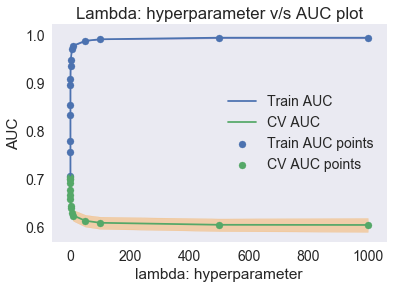

In [374]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')

parameters = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}

clf = GridSearchCV(lr, parameters, cv= 10, n_jobs=-1,scoring='roc_auc')

clf.fit(x_train_bow, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

graph is not clear to obtain bst hyperparameter. so let choose a perticular section.

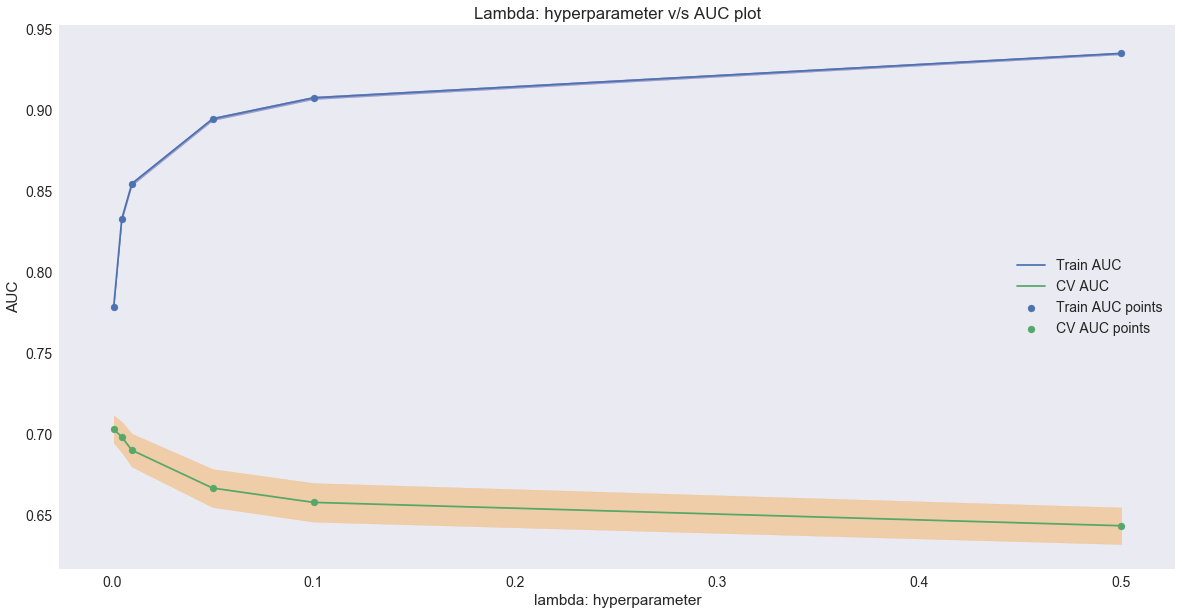

In [375]:
lr = LogisticRegression(class_weight='balanced')

parameters = {'C':[0.5, 0.1, 0.05, 0.01, 0.005, 0.001]}

clf = GridSearchCV(lr, parameters, cv= 10, scoring='roc_auc')

clf.fit(x_train_bow, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(20,10))

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

In [376]:
print(clf.best_score_)
print(clf.best_estimator_)

0.7033053122270374
LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


Observation:  
    best C value is 0.001

In [424]:
C_bow=0.001


#### AUC plot for test and train dataset,<font color='red'> SET 1</font>

In [425]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

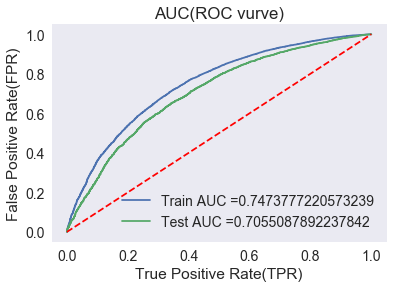

In [426]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

clf = LogisticRegression(C = C_bow)

clf.fit(x_train_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, x_train_bow)    
y_test_pred = batch_predict(clf, x_test_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

BOW_auc_train = auc(train_fpr, train_tpr)
BOW_auc_auc_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC(ROC vurve)")
plt.grid()
plt.show()

## Confusion matrix,<font color='red'> SET 1</font>

In [427]:
#CONFUSION MATRIX
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions




### confusing matrix for train dataset

TRAIN confusion matrix
the maximum value of tpr*(1-fpr) 0.46876303248326384 for threshold 0.84
[[ 3782  1471]
 [10705 19042]]
the maximum value of tpr*(1-fpr) 0.46876303248326384 for threshold 0.84


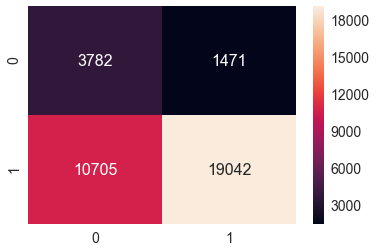

In [428]:
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))


conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

### confusing matrix for test dataset

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.42796176655140317 for threshold 0.829
[[1388  854]
 [4085 8673]]
the maximum value of tpr*(1-fpr) 0.42796176655140317 for threshold 0.829


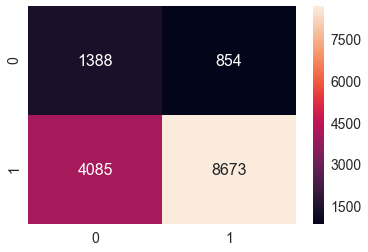

In [429]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

# 2.3.2 Applying Logistic regression on TFIDF, <font color='red'> SET 2</font>

####vectorize the essay with `tfidf with bi-grams` with `min_df=10` and `max_features=5000` and title data,<font color='red'> SET 2</font>

In [377]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(min_df=10,  ngram_range=(1,2), max_features=5000)
vectorizer_tfidf.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data
z_tfidf1=vectorizer_tfidf.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_tfidf_essays = vectorizer_tfidf.transform(x_train['preprocessed_essays'].values)
#x_cv_tfidf_essays = vectorizer_tfidf.transform(x_cv['preprocessed_essays'].values)
x_test_tfidf_essays = vectorizer_tfidf.transform(x_test['preprocessed_essays'].values)

print("Shape of matrix after one hot encodig ",x_train_tfidf_essays.shape, y_train.shape)
#print("Shape of matrix after one hot encodig ",x_cv_tfidf_essays.shape)
print("Shape of matrix after one hot encodig ",x_test_tfidf_essays.shape)

Shape of matrix after one hot encodig  (35000, 5000) (35000,)
Shape of matrix after one hot encodig  (15000, 5000)


In [378]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()
vectorizer_tfidf.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data
z_tfidf2=vectorizer_tfidf.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_tfidf_title = vectorizer_tfidf.transform(x_train['preprocessed_project_title'].values)
#x_cv_tfidf_title = vectorizer_tfidf.transform(x_cv['preprocessed_project_title'].values)
x_test_tfidf_title = vectorizer_tfidf.transform(x_test['preprocessed_project_title'].values)

print("Shape of matrix after one hot encodig ",x_train_tfidf_title.shape)
#print("Shape of matrix after one hot encodig ",x_cv_tfidf_title.shape)
print("Shape of matrix after one hot encodig ",x_test_tfidf_title.shape)

Shape of matrix after one hot encodig  (35000, 9899)
Shape of matrix after one hot encodig  (15000, 9899)


#### merge all sparse data,<font color='red'> SET 2</font>

In [379]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_tfidf = hstack((x_train_ohe, x_train_tfidf_essays, x_train_tfidf_title)).tocsr()
#x_cv_tfidf = hstack((x_cv_ohe, x_cv_tfidf_essays, x_cv_tfidf_title)).tocsr()
x_test_tfidf = hstack((x_test_ohe, x_test_tfidf_essays, x_test_tfidf_title)).tocsr()

print(x_train_tfidf.shape)
#print(x_cv_tfidf.shape)
print(x_test_tfidf.shape)

(35000, 15000)
(15000, 15000)


#### GridsearchCV,<font color='red'> SET 2</font>

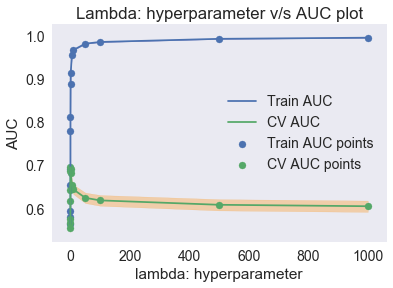

In [380]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')

parameters = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}

clf = GridSearchCV(lr, parameters, cv= 10, n_jobs=-1,scoring='roc_auc')

clf.fit(x_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

not able to get proper inference, so let zoom in

#### AUC plot for test and train dataset,<font color='red'> SET 2</font>

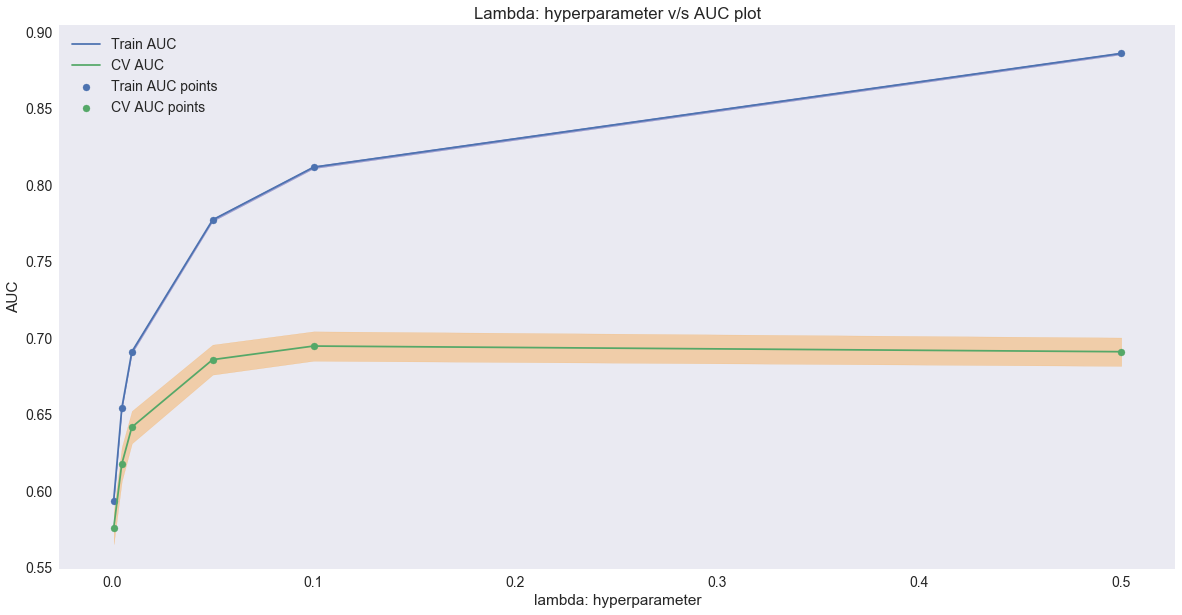

In [381]:
lr = LogisticRegression(class_weight='balanced')

parameters = {'C':[0.5, 0.1, 0.05, 0.01, 0.005, 0.001]}

clf = GridSearchCV(lr, parameters, cv= 10, scoring='roc_auc')

clf.fit(x_train_tfidf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(20,10))

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

so optimal C=0.5 from grid search

In [382]:
print(clf.best_score_)
print(clf.best_estimator_)

0.6948364362802313
LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [417]:
C_tfidf=0.1


#### ROC of tain , test and cv dataset,<font color='red'> SET 2</font>

In [418]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred




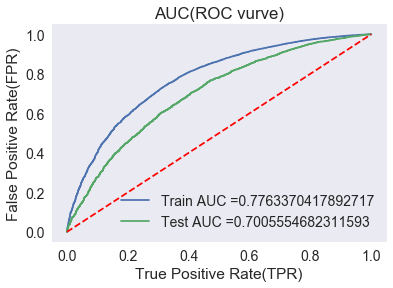

In [419]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

clf = LogisticRegression(C = C_tfidf)

clf.fit(x_train_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, x_train_tfidf)    
y_test_pred = batch_predict(clf, x_test_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

tfidf_auc_train = auc(train_fpr, train_tpr)
tfidf_auc_auc_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC(ROC vurve)")
plt.grid()
plt.show()

## Confusion matrix,<font color='red'> SET 2</font>

In [420]:
x_test_tfidf.shape

(15000, 15000)

In [421]:
#CONFUSION MATRIX
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions




TRAIN confusion matrix
the maximum value of tpr*(1-fpr) 0.5016457370349072 for threshold 0.843
[[ 3856  1397]
 [ 9706 20041]]
the maximum value of tpr*(1-fpr) 0.5016457370349072 for threshold 0.843


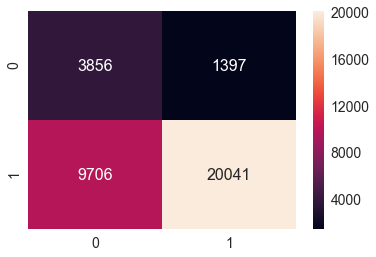

In [422]:
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))


conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.417458692724888 for threshold 0.846
[[1469  773]
 [4686 8072]]
the maximum value of tpr*(1-fpr) 0.417458692724888 for threshold 0.846


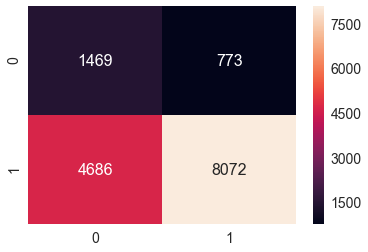

In [423]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

# 2.3.3 Applying Logistic regression on AVG W2V, <font color='red'> SET 3</font>

#### vectorize using AVG W2V,<font color='red'> SET 3</font>

In [294]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [383]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [384]:
# Using Pretrained Models: AVG W2V on `essay`
#_______________________________________________

# -----average Word2Vec on train
# compute average word2vec for each review.
avg_w2v_vectors_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_train.append(vector)

print(len(avg_w2v_vectors_essays_train))
print(len(avg_w2v_vectors_essays_train[0]))

100%|██████████████████████████████████████████████████████████████████████████| 35000/35000 [00:07<00:00, 4837.44it/s]


35000
300


In [385]:
'''# -----average Word2Vec on CV
# compute average word2vec for each review.
avg_w2v_vectors_essays_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_cv.append(vector)

print(len(avg_w2v_vectors_essays_cv))
print(len(avg_w2v_vectors_essays_cv[0]))'''

"# -----average Word2Vec on CV\n# compute average word2vec for each review.\navg_w2v_vectors_essays_cv = []; # the avg-w2v for each sentence/review is stored in this list\nfor sentence in tqdm(x_cv['preprocessed_essays']): # for each review/sentence\n    vector = np.zeros(300) # as word vectors are of zero length\n    cnt_words =0; # num of words with a valid vector in the sentence/review\n    for word in sentence.split(): # for each word in a review/sentence\n        if word in glove_words:\n            vector += model[word]\n            cnt_words += 1\n    if cnt_words != 0:\n        vector /= cnt_words\n    avg_w2v_vectors_essays_cv.append(vector)\n\nprint(len(avg_w2v_vectors_essays_cv))\nprint(len(avg_w2v_vectors_essays_cv[0]))"

In [386]:
# -----average Word2Vec on test
# compute average word2vec for each review.
avg_w2v_vectors_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_test.append(vector)

print(len(avg_w2v_vectors_essays_test))
print(len(avg_w2v_vectors_essays_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:03<00:00, 4769.29it/s]


15000
300


In [387]:
# Using Pretrained Models: AVG W2V on `project_title`
#_____________________________________________________

# ------average Word2Vec on train
# compute average word2vec for each review.
avg_w2v_vectors_project_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_train.append(vector)

print(len(avg_w2v_vectors_project_title_train))
print(len(avg_w2v_vectors_project_title_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 35000/35000 [00:00<00:00, 92172.90it/s]


35000
300


In [388]:
'''# ------average Word2Vec on cv
# compute average word2vec for each review.
avg_w2v_vectors_project_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_cv['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_cv.append(vector)

print(len(avg_w2v_vectors_project_title_cv))
print(len(avg_w2v_vectors_project_title_cv[0]))'''

"# ------average Word2Vec on cv\n# compute average word2vec for each review.\navg_w2v_vectors_project_title_cv = []; # the avg-w2v for each sentence/review is stored in this list\nfor sentence in tqdm(x_cv['preprocessed_project_title']): # for each review/sentence\n    vector = np.zeros(300) # as word vectors are of zero length\n    cnt_words =0; # num of words with a valid vector in the sentence/review\n    for word in sentence.split(): # for each word in a review/sentence\n        if word in glove_words:\n            vector += model[word]\n            cnt_words += 1\n    if cnt_words != 0:\n        vector /= cnt_words\n    avg_w2v_vectors_project_title_cv.append(vector)\n\nprint(len(avg_w2v_vectors_project_title_cv))\nprint(len(avg_w2v_vectors_project_title_cv[0]))"

In [389]:
# ------average Word2Vec on test
# compute average word2vec for each review.
avg_w2v_vectors_project_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_test.append(vector)

print(len(avg_w2v_vectors_project_title_test))
print(len(avg_w2v_vectors_project_title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 84218.01it/s]


15000
300


#### merge all sparse data,<font color='red'> SET 3</font>

In [390]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_AVGW2V = hstack((x_train_ohe, avg_w2v_vectors_essays_train, avg_w2v_vectors_project_title_train)).tocsr()
#x_cv_AVGW2V = hstack((x_cv_ohe, avg_w2v_vectors_essays_cv, avg_w2v_vectors_project_title_cv)).tocsr()
x_test_AVGW2V = hstack((x_test_ohe, avg_w2v_vectors_essays_test, avg_w2v_vectors_project_title_test)).tocsr()

print(x_train_AVGW2V.shape)
#print(x_cv_AVGW2V.shape)
print(x_test_AVGW2V.shape)

(35000, 701)
(15000, 701)


#### GridsearchCV,<font color='red'> SET 3</font>

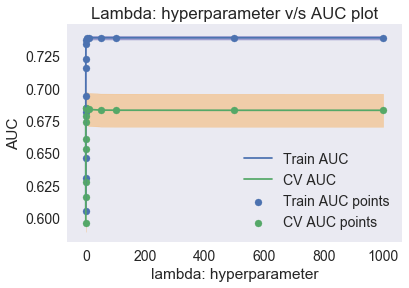

In [391]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')

parameters = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}

clf = GridSearchCV(lr, parameters, cv= 10, n_jobs=-1,scoring='roc_auc')

clf.fit(x_train_AVGW2V, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

inferencee is not ppossible so let zoom in.

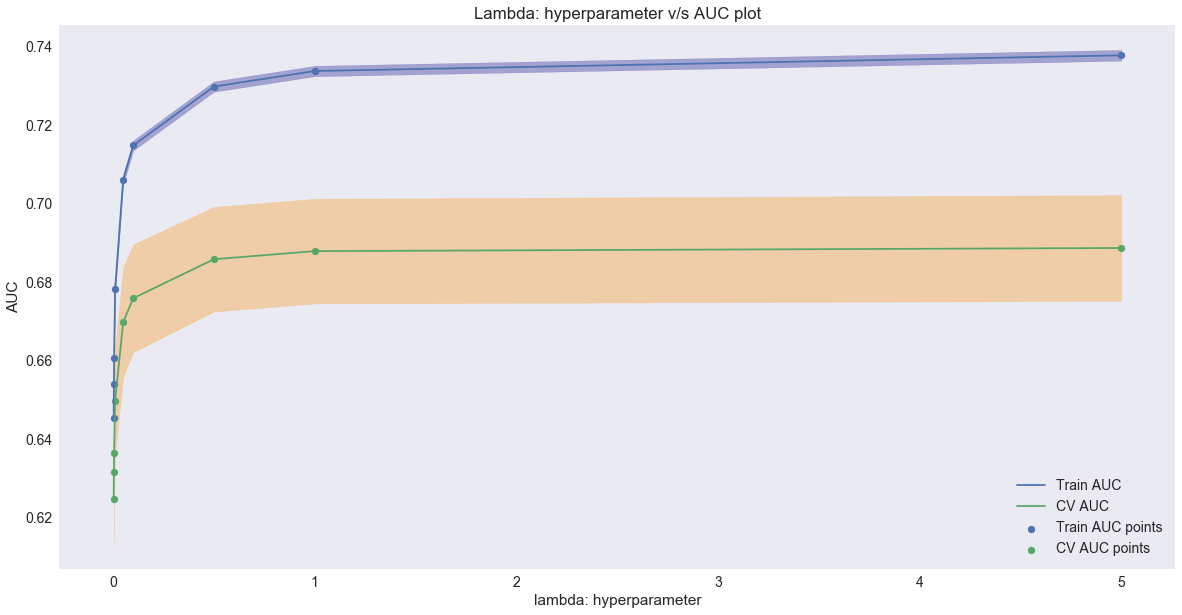

In [392]:
lr = LogisticRegression()

parameters = {'C':[5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]}

clf = GridSearchCV(lr, parameters, cv= 10, scoring='roc_auc')

clf.fit(x_train_AVGW2V, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(20,10))

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

In [393]:
print(clf.best_score_)
print(clf.best_estimator_)

0.6887029468752826
LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [412]:
C_AVGW2V=5


#### AUC plot for test and train dataset,<font color='red'> SET 3</font>

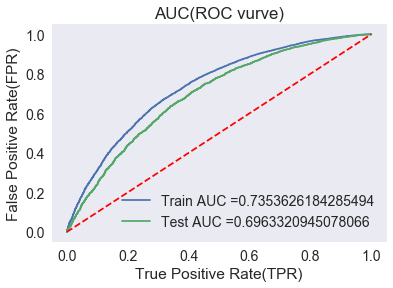

In [413]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred


# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

clf = LogisticRegression(C = C_AVGW2V)

clf.fit(x_train_AVGW2V, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, x_train_AVGW2V)    
y_test_pred = batch_predict(clf, x_test_AVGW2V)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

AVGW2V_auc_train = auc(train_fpr, train_tpr)
AVGW2V_auc_auc_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC(ROC vurve)")
plt.grid()
plt.show()



#### Confusion matrix,<font color='red'> SET 3</font>

In [414]:
#CONFUSION MATRIX
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions




TRAIN confusion matrix
the maximum value of tpr*(1-fpr) 0.4580473958468623 for threshold 0.842
[[ 3508  1745]
 [ 9454 20293]]
the maximum value of tpr*(1-fpr) 0.4580473958468623 for threshold 0.842


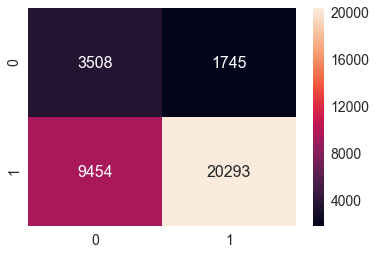

In [415]:

print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))


conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.419809738941853 for threshold 0.871
[[1566  676]
 [5423 7335]]
the maximum value of tpr*(1-fpr) 0.419809738941853 for threshold 0.871


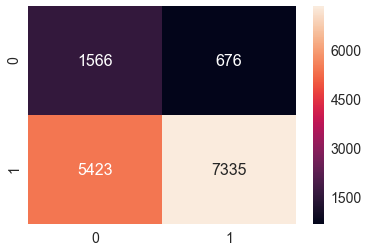

In [416]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.3.4 Applying Logistic regression on TFIDF AVG W2V, <font color='red'> SET 4</font>

#### Vectorize using TFIDF W2V,<font color='red'> SET 4</font>

In [394]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


In [395]:
#Using Pretrained Models: TFIDFW weighted W2V on `essay
#___________________________________

# average Word2Vec---train
# compute average word2vec for each review.
tfidf_w2v_vectors_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays_train.append(vector)

print(len(tfidf_w2v_vectors_essays_train))
print(len(tfidf_w2v_vectors_essays_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 35000/35000 [00:55<00:00, 625.79it/s]


35000
300


In [396]:
'''# average Word2Vec---cv
# compute average word2vec for each review.
tfidf_w2v_vectors_essays_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays_cv.append(vector)

print(len(tfidf_w2v_vectors_essays_cv))
print(len(tfidf_w2v_vectors_essays_cv[0]))'''

"# average Word2Vec---cv\n# compute average word2vec for each review.\ntfidf_w2v_vectors_essays_cv = []; # the avg-w2v for each sentence/review is stored in this list\nfor sentence in tqdm(x_cv['preprocessed_essays']): # for each review/sentence\n    vector = np.zeros(300) # as word vectors are of zero length\n    tf_idf_weight =0; # num of words with a valid vector in the sentence/review\n    for word in sentence.split(): # for each word in a review/sentence\n        if (word in glove_words) and (word in tfidf_words):\n            vec = model[word] # getting the vector for each word\n            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))\n            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word\n            vector += (vec * tf_idf) # calculating tfidf weighted w2v\n            tf_idf_weight += tf_idf\n    if tf_idf_weight != 0:\n        vector /= 

In [397]:
# average Word2Vec---test
# compute average word2vec for each review.
tfidf_w2v_vectors_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays_test.append(vector)

print(len(tfidf_w2v_vectors_essays_test))
print(len(tfidf_w2v_vectors_essays_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [00:23<00:00, 631.02it/s]


15000
300


In [398]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['preprocessed_project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [399]:
#Using Pretrained Models: TFIDFW weighted W2V on "preprocessed_project_title"
#___________________________________________
# average Word2Vec--train
# compute average word2vec for each review.
tfidf_w2v_vectors_project_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_train.append(vector)

print(len(tfidf_w2v_vectors_project_title_train))
print(len(tfidf_w2v_vectors_project_title_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 35000/35000 [00:00<00:00, 39668.46it/s]


35000
300


In [400]:
'''# average Word2Vec--cv
# compute average word2vec for each review.
tfidf_w2v_vectors_project_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_cv['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_cv.append(vector)

print(len(tfidf_w2v_vectors_project_title_cv))
print(len(tfidf_w2v_vectors_project_title_cv[0]))'''

"# average Word2Vec--cv\n# compute average word2vec for each review.\ntfidf_w2v_vectors_project_title_cv = []; # the avg-w2v for each sentence/review is stored in this list\nfor sentence in tqdm(x_cv['preprocessed_project_title']): # for each review/sentence\n    vector = np.zeros(300) # as word vectors are of zero length\n    tf_idf_weight =0; # num of words with a valid vector in the sentence/review\n    for word in sentence.split(): # for each word in a review/sentence\n        if (word in glove_words) and (word in tfidf_words):\n            vec = model[word] # getting the vector for each word\n            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))\n            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word\n            vector += (vec * tf_idf) # calculating tfidf weighted w2v\n            tf_idf_weight += tf_idf\n    if tf_idf_weight != 0:\n     

In [401]:
# average Word2Vec--test
# compute average word2vec for each review.
tfidf_w2v_vectors_project_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_test.append(vector)

print(len(tfidf_w2v_vectors_project_title_test))
print(len(tfidf_w2v_vectors_project_title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 33130.52it/s]


15000
300


#### merge all aparse data,<font color='red'> SET 4</font>

In [402]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_TFIDFW2V = hstack((x_train_ohe, tfidf_w2v_vectors_essays_train, tfidf_w2v_vectors_project_title_train)).tocsr()
#x_cv_TFIDFW2V = hstack((x_cv_ohe, tfidf_w2v_vectors_essays_cv, tfidf_w2v_vectors_project_title_cv)).tocsr()
x_test_TFIDFW2V = hstack((x_test_ohe, tfidf_w2v_vectors_essays_test, tfidf_w2v_vectors_project_title_test)).tocsr()

print(x_train_TFIDFW2V.shape)
#print(x_cv_TFIDFW2V.shape)
print(x_test_TFIDFW2V.shape)

(35000, 701)
(15000, 701)


#### GridsearchCV,<font color='red'> SET 4</font>

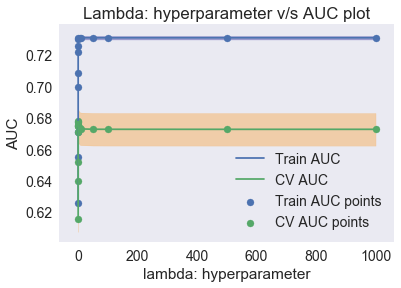

In [403]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')

parameters = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}

clf = GridSearchCV(lr, parameters, cv= 10, n_jobs=-1,scoring='roc_auc')

clf.fit(x_train_TFIDFW2V, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

let go in less range of c value for inference

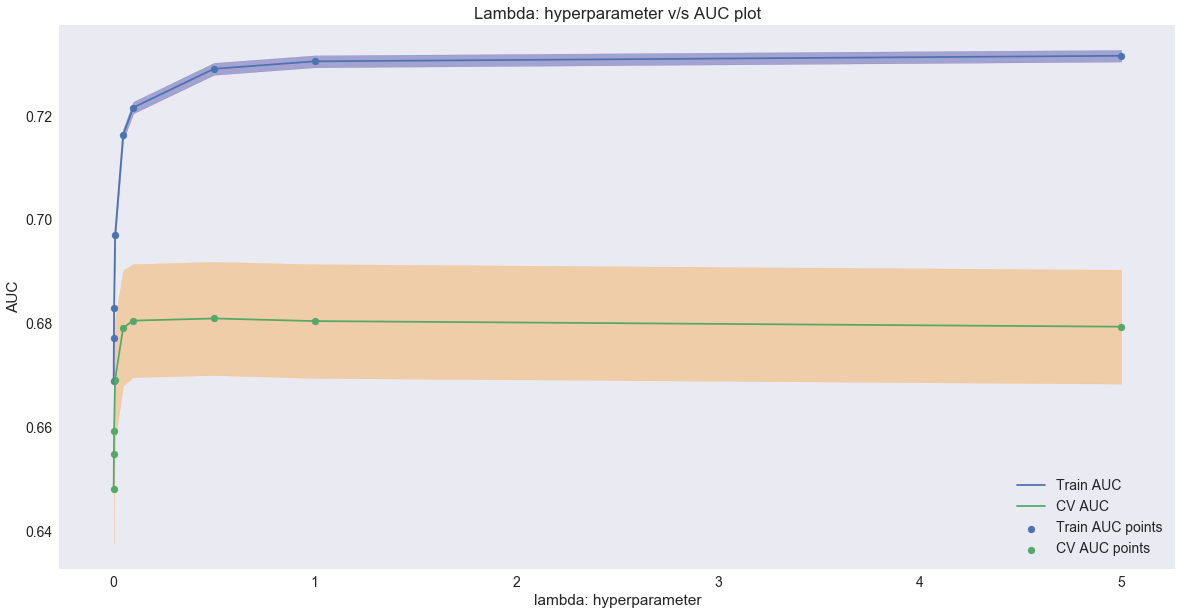

In [404]:
lr = LogisticRegression()

parameters = {'C':[5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]}

clf = GridSearchCV(lr, parameters, cv= 10, scoring='roc_auc')

clf.fit(x_train_TFIDFW2V, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(20,10))

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

In [405]:

print(clf.best_score_)
print(clf.best_estimator_)



0.6809770370975313
LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [406]:
C_TFIDFW2V=0.5


#### AUC plot for test and train dataset,<font color='red'> SET 4</font>

In [407]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred




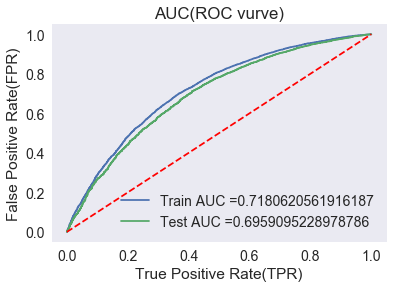

In [408]:

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

clf = LogisticRegression(C = C_TFIDFW2V)

clf.fit(x_train_AVGW2V, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, x_train_TFIDFW2V)    
y_test_pred = batch_predict(clf, x_test_TFIDFW2V)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

TFIDFW2V_auc_train = auc(train_fpr, train_tpr)
TFIDFW2V_auc_auc_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC(ROC vurve)")
plt.grid()
plt.show()

#### Confusion matrix,<font color='red'> SET 4</font>

In [409]:
#CONFUSION MATRIX
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions






TRAIN confusion matrix
the maximum value of tpr*(1-fpr) 0.44287744853736394 for threshold 0.91
[[ 3744  1509]
 [11797 17950]]
the maximum value of tpr*(1-fpr) 0.44287744853736394 for threshold 0.91


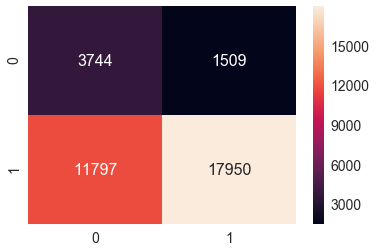

In [410]:

print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))


conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.41972593782089673 for threshold 0.905
[[1499  743]
 [4928 7830]]
the maximum value of tpr*(1-fpr) 0.41972593782089673 for threshold 0.905


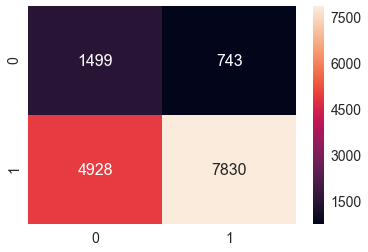

In [411]:

print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

# 2.5 Logistic Regression with added Features `Set 5` <font color='red'> SET 5</font>

In [319]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [578]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_ohe_set5 = np.hstack((x_train_title_word_normalize, x_train_essay_word_normalize, x_train_sentiment_pos_essay_normalize, x_train_sentiment_neg_essay_normalize, x_train_sentiment_neu_essay_normalize, x_train_sentiment_compound_essay_normalize))
#x_cv_ohe = hstack((x_cv_categories_one_hot, x_cv_subcategories_one_hot, x_cv_school_state_one_hot, x_cv_grade_category_one_hot, x_cv_prefix_one_hot, x_cv_price_standardized))
x_test_ohe_set5 = np.hstack((x_test_title_word_normalize, x_test_essay_word_normalize, x_test_sentiment_pos_essay_normalize, x_test_sentiment_neg_essay_normalize, x_test_sentiment_neu_essay_normalize, x_test_sentiment_compound_essay_normalize))

print(x_train_ohe.shape)
#print(x_cv_ohe.shape)
print(x_test_ohe.shape)

(35000, 101)
(15000, 101)


In [579]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_ohe = hstack((x_train_categories_one_hot, x_train_subcategories_one_hot, x_train_school_state_one_hot, x_train_grade_category_one_hot, x_train_prefix_one_hot, x_train_price_standardized))
#x_cv_ohe = hstack((x_cv_categories_one_hot, x_cv_subcategories_one_hot, x_cv_school_state_one_hot, x_cv_grade_category_one_hot, x_cv_prefix_one_hot, x_cv_price_standardized))
x_test_ohe = hstack((x_test_categories_one_hot, x_test_subcategories_one_hot, x_test_school_state_one_hot, x_test_grade_category_one_hot, x_test_prefix_one_hot, x_test_price_standardized))

print(x_train_ohe.shape)
#print(x_cv_ohe.shape)
print(x_test_ohe.shape)

(35000, 101)
(15000, 101)


#### preparing data for set 5 </font>

In [580]:
# merge the matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_set5 = hstack((x_train_ohe_set5,x_train_ohe)).tocsr()
x_test_set5 = hstack((x_test_ohe_set5,x_test_ohe)).tocsr()


print(x_train_set5.shape)

(35000, 107)


In [581]:
type(x_train_set5)

scipy.sparse.csr.csr_matrix

#### GridsearchCV,<font color='red'> SET 5</font>

In [ ]:
type(x_train5)

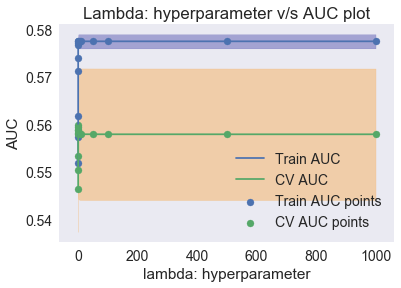

In [582]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')

parameters = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}

clf = GridSearchCV(lr, parameters, cv= 10, n_jobs=-1,scoring='roc_auc')

clf.fit(x_train_set5, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

let go in less range of c value for inference

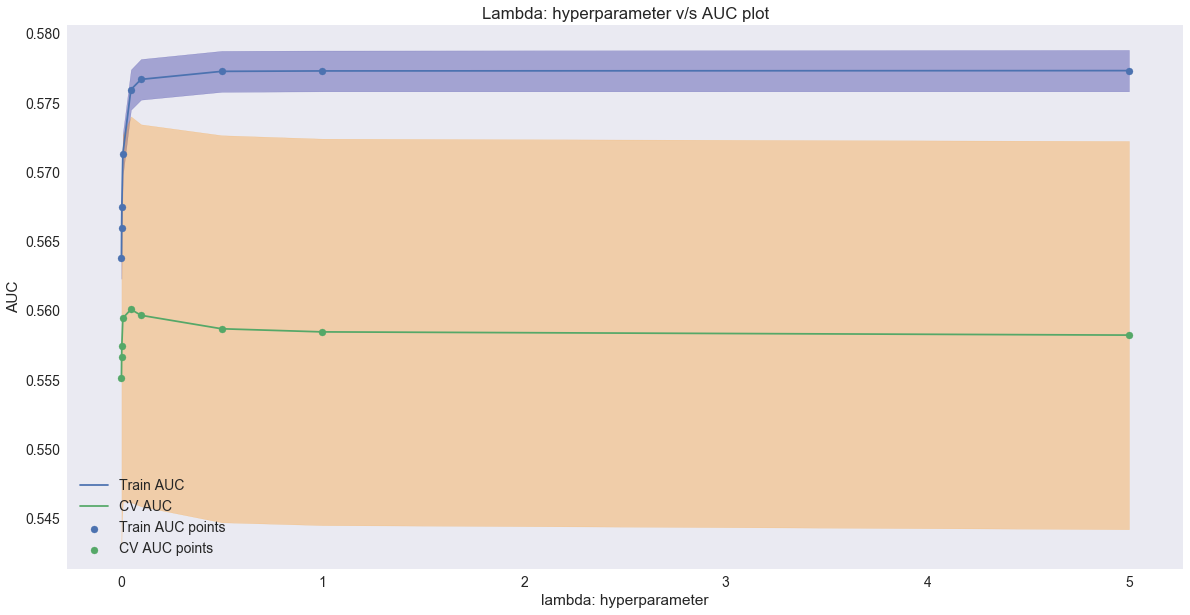

In [583]:
lr = LogisticRegression()

parameters = {'C':[5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]}

clf = GridSearchCV(lr, parameters, cv= 10, scoring='roc_auc')

clf.fit(x_train_set5, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(20,10))

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("lambda: hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

In [584]:

print(clf.best_score_)
print(clf.best_estimator_)



0.5601056548468532
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [585]:
C_set5=0.05

#### AUC plot for test and train dataset,<font color='red'> SET 5</font>

In [586]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

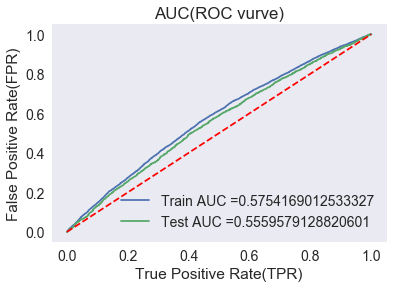

In [592]:

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

clf = LogisticRegression(C = C_set5)

clf.fit(x_train_set5, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf, x_train_set5)    
y_test_pred = batch_predict(clf, x_test_set5)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

TFIDFW2V_auc_train = auc(train_fpr, train_tpr)
TFIDFW2V_auc_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC(ROC vurve)")
plt.grid()
plt.show()

#### Confusion matrix,<font color='red'> SET 5</font>

In [588]:
#CONFUSION MATRIX
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


TRAIN confusion matrix
the maximum value of tpr*(1-fpr) 0.3129638648867069 for threshold 0.85
[[ 3093  2236]
 [13869 15802]]
the maximum value of tpr*(1-fpr) 0.3129638648867069 for threshold 0.85


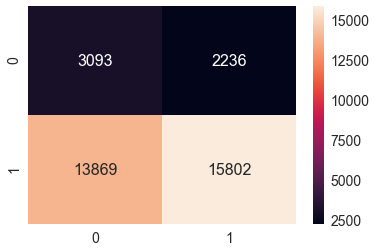

In [589]:
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))


conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2977699887645207 for threshold 0.849
[[1191 1035]
 [5726 7048]]
the maximum value of tpr*(1-fpr) 0.2977699887645207 for threshold 0.849


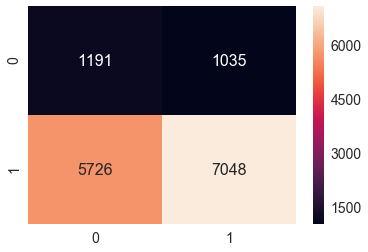

In [590]:




print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

## <h1>3. Conclusion</h1>

In [350]:
# Please compare all your models using Prettytable library

In [351]:
#!pip install prettytable

In [596]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model","Hyper parameter_penalty", "Hyper parameter_C","AUC_Train",  "AUC_test"]
x.add_row(["BOW", "LogisticRegression", "l2",C_bow, BOW_auc_train,BOW_auc_auc_test])
x.add_row(["TFIDF", "LogisticRegression", "l2",C_tfidf, tfidf_auc_train,tfidf_auc_auc_test])
x.add_row(["AVG W2V", "LogisticRegression", "l2",C_AVGW2V, AVGW2V_auc_train,AVGW2V_auc_auc_test])
x.add_row(["TFIDF AVG W2V", "LogisticRegression", "l2",C_TFIDFW2V, TFIDFW2V_auc_train,TFIDFW2V_auc_auc_test])
x.add_row(["SET 5", "LogisticRegression", "l2", C_set5,TFIDFW2V_auc_train,TFIDFW2V_auc_test])
print(x)

with open('Result_DonorsChoose_LR.txt', 'w') as w:
    w.write(str(x))

+---------------+--------------------+-------------------------+-------------------+--------------------+--------------------+
|   Vectorizer  |       Model        | Hyper parameter_penalty | Hyper parameter_C |     AUC_Train      |      AUC_test      |
+---------------+--------------------+-------------------------+-------------------+--------------------+--------------------+
|      BOW      | LogisticRegression |            l2           |       0.001       | 0.7473777220573239 | 0.7055087892237842 |
|     TFIDF     | LogisticRegression |            l2           |        0.1        | 0.7763370417892717 | 0.7005554682311593 |
|    AVG W2V    | LogisticRegression |            l2           |         5         | 0.7353626184285494 | 0.6963320945078066 |
| TFIDF AVG W2V | LogisticRegression |            l2           |        0.5        | 0.5754169012533327 | 0.5559579128820601 |
|     SET 5     | LogisticRegression |            l2           |        0.05       | 0.5754169012533327 | 0.555

OBSERVATION:

    FOR BOW and set 5, C value is very low, means coeifficient of reguarilization is very high which means training error decrease significantly.
    
    TFIDF, AVG W2V and TFIDF weighted W2V are having high value of C si coeifficient of reguarilization is very low.
    
    L2 reguarilization used as default.
    